In [1]:
pip install "yfinance"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import precision_score as ps
import pandas as pd

In [3]:
# initilaizr s tikrer class to download price history for a single symbol
sp500 = yf.Ticker("^GSPC")

In [4]:
# query the historical pricess
sp500 = sp500.history(period = "max") # all data from begining

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,0.0,0.0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,0.0,0.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,0.0,0.0


In [66]:
# Save the data to a CSV file
sp500.to_csv("sp500_data.csv")

In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-22 00:00:00-04:00', '2024-03-25 00:00:00-04:00',
               '2024-03-26 00:00:00-04:00', '2024-03-27 00:00:00-04:00',
               '2024-03-28 00:00:00-04:00', '2024-04-01 00:00:00-04:00',
               '2024-04-02 00:00:00-04:00', '2024-04-03 00:00:00-04:00',
               '2024-04-04 00:00:00-04:00', '2024-04-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24181, freq=None)

# Cleaning and Visualizing

<AxesSubplot:xlabel='Date'>

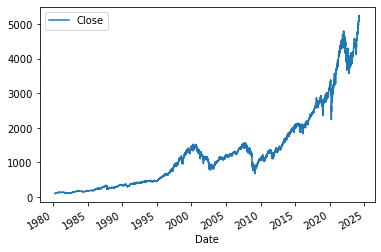

In [20]:
sp500.plot.line(y = "Close", use_index = True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000


In [10]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,5205.810059
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # return boolean true or false ot integer
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,5205.810059,0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0


In [12]:
# remove all data before 1990
sp500 = sp500.loc["1980-04-04":].copy() #.copy helps to avoid error (pandas setting with copy warining)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-04-07 00:00:00-05:00,0.000000,102.269997,99.730003,100.190002,29130000,101.199997,1
1980-04-08 00:00:00-05:00,0.000000,101.879997,99.230003,101.199997,31700000,103.110001,1
1980-04-09 00:00:00-05:00,0.000000,103.599998,101.010002,103.110001,33020000,104.080002,1
1980-04-10 00:00:00-05:00,0.000000,105.000000,102.809998,104.080002,33940000,103.790001,0
1980-04-11 00:00:00-05:00,0.000000,105.150002,103.199997,103.790001,29960000,102.839996,0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,5205.810059,0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0


# Machine Learning Model Training

In [23]:
model = rfc(n_estimators=100, min_samples_split=100, random_state=1)

# all the rows exept last 100 for training
train = sp500.iloc[:-100]
test = sp500.iloc[-100:] # last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"]) # predict the Target


RandomForestClassifier(min_samples_split=100, random_state=1)

In [25]:
preds = model.predict(test[predictors])
preds

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-11-10 00:00:00-05:00    1
2023-11-13 00:00:00-05:00    0
2023-11-14 00:00:00-05:00    0
2023-11-15 00:00:00-05:00    0
2023-11-16 00:00:00-05:00    0
                            ..
2024-04-01 00:00:00-04:00    0
2024-04-02 00:00:00-04:00    0
2024-04-03 00:00:00-04:00    0
2024-04-04 00:00:00-04:00    0
2024-04-05 00:00:00-04:00    0
Length: 100, dtype: int32

In [27]:
# calculate the precision score
ps(test["Target"], preds)

0.6

<AxesSubplot:xlabel='Date'>

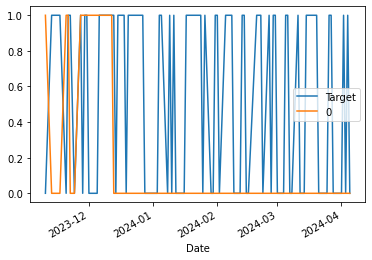

In [28]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

as we can see above:
0 in orange is our prdictions and Target in blue what acctually happend 

# Back Testing System

In [46]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [47]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [48]:
predictions = backtest(sp500, model, predictors)

In [49]:
predictions["Predictions"].value_counts()

0    4933
1    3660
Name: Predictions, dtype: int64

In [50]:
ps(predictions["Target"], predictions["Predictions"])

0.5297814207650273

In [51]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535436
0    0.464564
Name: Target, dtype: float64

# Adding more predictors to the model


In [63]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

C:\Users\AH523E~1\AppData\Local\Temp/ipykernel_6912/714408309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
C:\Users\AH523E~1\AppData\Local\Temp/ipykernel_6912/714408309.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


In [64]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1984-03-20 00:00:00-05:00,157.779999,159.169998,157.779999,158.860001,86460000,158.660004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-03-21 00:00:00-05:00,158.860001,159.259995,158.589996,158.660004,87170000,156.690002,0,0.999370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-03-22 00:00:00-05:00,158.660004,158.669998,156.610001,156.690002,87340000,156.860001,1,0.993753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-03-23 00:00:00-05:00,156.690002,156.919998,156.020004,156.860001,79760000,156.669998,0,1.000542,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-03-26 00:00:00-05:00,156.860001,157.179993,156.309998,156.669998,69070000,157.300003,1,0.999394,1.0,0.994427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,5205.810059,0,0.998992,1.0,1.001929,2.0,1.047563,34.0,1.157343,138.0,1.280394,533.0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1,0.996367,0.0,0.995146,2.0,1.038192,34.0,1.147869,137.0,1.270375,532.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0,1.000545,1.0,0.995931,3.0,1.037551,34.0,1.147997,138.0,1.271002,533.0


In [53]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [54]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1984-03-20 00:00:00-05:00,157.779999,159.169998,157.779999,158.860001,86460000,158.660004,0,1.003411,1.0,1.005328,3.0,0.986579,25.0,0.971302,125.0,1.178494,503.0
1984-03-21 00:00:00-05:00,158.860001,159.259995,158.589996,158.660004,87170000,156.690002,0,0.999370,1.0,1.001667,3.0,0.985803,25.0,0.969937,125.0,1.176509,502.0
1984-03-22 00:00:00-05:00,158.660004,158.669998,156.610001,156.690002,87340000,156.860001,1,0.993753,0.0,0.990130,2.0,0.974377,24.0,0.957781,125.0,1.161439,501.0
1984-03-23 00:00:00-05:00,156.690002,156.919998,156.020004,156.860001,79760000,156.669998,0,1.000542,1.0,0.994232,2.0,0.976292,24.0,0.958696,126.0,1.162245,501.0
1984-03-26 00:00:00-05:00,156.860001,157.179993,156.309998,156.669998,69070000,157.300003,1,0.999394,1.0,0.994427,2.0,0.975938,24.0,0.957458,125.0,1.160382,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,5205.810059,0,0.998992,1.0,1.001929,2.0,1.047563,34.0,1.157343,138.0,1.280394,533.0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1,0.996367,0.0,0.995146,2.0,1.038192,34.0,1.147869,137.0,1.270375,532.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0,1.000545,1.0,0.995931,3.0,1.037551,34.0,1.147997,138.0,1.271002,533.0


# Improve The Model

In [55]:
model = rfc(n_estimators=200, min_samples_split=50, random_state=1)

In [56]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [57]:
predictions = backtest(sp500, model, new_predictors)

In [58]:
predictions["Predictions"].value_counts()

0.0    6207
1.0    1386
Name: Predictions, dtype: int64

In [59]:
ps(predictions["Target"], predictions["Predictions"])

0.564935064935065

<!-- DONE -->

# Done!


### Trying diffrent models

In [30]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
# import xgboost as xgb

In [32]:

# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X = sp500[predictors]
# y = sp500["Target"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the XGBoost model
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# # Train the model
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = xgb_model.predict(X_test)

# # Evaluate the model's performance
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"Precision: {precision_score(y_test, y_pred):.4f}")
# print(f"Recall: {recall_score(y_test, y_pred):.4f}")
# print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.5363
Precision: 0.5664
Recall: 0.6260
F1-score: 0.5947


In [45]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Split the data into training and testing sets
# X = sp500[predictors]
# y = sp500["Target"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the SVM model
# svm_model = SVC(kernel='rbf', random_state=42)

# # Tune the hyperparameters using GridSearchCV
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train the model with the best hyperparameters
# svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
# svm_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_model.predict(X_test)

# # Evaluate the model's performance
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"Precision: {precision_score(y_test, y_pred):.4f}")
# print(f"Recall: {recall_score(y_test, y_pred):.4f}")
# print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.5417
Precision: 0.5429
Recall: 0.9925
F1-score: 0.7018
